In [11]:
import arcpy,numpy,pandas,json
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pandas.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
shp = {row[0]:row[1] for row in arcpy.da.SearchCursor("e:/work/机器学习/shp/jbnt.shp",
                                        ["FID","Shape@JSON"])}

In [40]:
pntnum = {"id":[],"num":[]}
for s in shp:
    j = json.loads(shp[s])
    pntnum["id"].append(s)
    pntnum["num"].append(len(j["rings"][0]))

In [41]:
pd = pandas.DataFrame(pntnum)

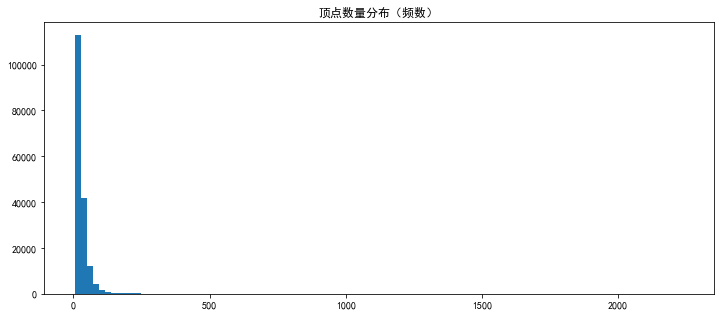

In [55]:
plt.figure(figsize=(12,5))
plt.title("顶点数量分布（频数）")
plt.hist(pd["num"],100)
pass

In [67]:
pd.describe()

,id,num
count,175949.000,175949.000
mean,87974.000,30.289
std,50792.246,52.293
min,0.000,4.000
25%,43987.000,13.000
50%,87974.000,21.000
75%,131961.000,33.000
max,175948.000,2240.000


In [63]:
len(pd[pd["num"] > 200]) / len(pd)

0.0075987928320138225

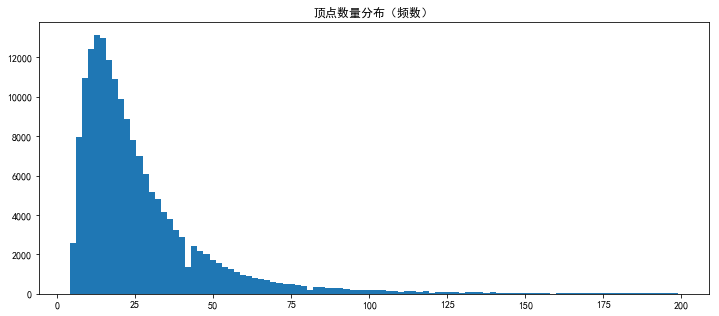

In [66]:
plt.figure(figsize=(12,5))
plt.title("顶点数量分布（频数）")
plt.hist(pd["num"][pd["num"] < 200],100)
pass

In [73]:
def IsConVex(polygon):
    r=len(polygon)
    for i in range(r):
        x = polygon[(i+1)%r][0] - polygon[i%r][0]
        y = polygon[(i+1)%r][1] - polygon[(i%r)][1]
        x1,y1=polygon[(i+1)%r] 
        x2,y2=polygon[(i-1+r)%r]
        if(y*x2 + x*y1 -y*x1) > y2*x:
            return False
        return True

In [76]:
a,t = 0,0
for s in shp:
    j = json.loads(shp[s])["rings"][0]
    if IsConVex(j):
        t +=1
    else:
        a +=1

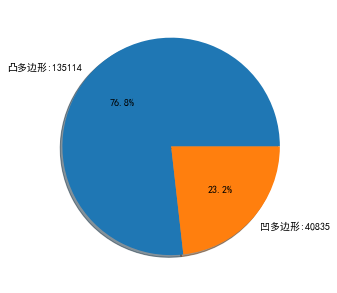

In [85]:
plt.figure(figsize=(6,5))
plt.pie((a,t),labels=(u"凸多边形:{0}".format(a),
                      u"凹多边形:{0}".format(t)),autopct='%1.1f%%',shadow=True)
pass